## A6.5 Machine Learning - Clustering
### The following script contains the following:

#### 1. Import data, libraries, additional requirements
#### 2. Consistency checks
#### 3. Data preprocessing
#### 3. The elbow technique
#### 4. K-means clustering
---------------------------------------------------------------------------------------------------------------------------
### 1. Import libraries, additional requirements and data


In [1]:
# Import data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
# Additional requirements

# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#  Create/save project folder path
path = r"C:\Users\keanu\OneDrive\Desktop\Career Foundry\Boat Sales Analysis"

# Read data (csv file)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_final.csv'), index_col=False)

---------------------------------------------------------------------------------------------------------------------------
### 2. Consistency checks

In [4]:
# View dataframe
df

,Unnamed: 0,Category,Manufacturer,Specifications,Year Built,Year Built Condition,Length,Length Condition,Width,Width Condition,Material,Price,Price Condition,Currency,Country,State_Region,Location,# of views last 7 days,Views Condition
0,0,Motor Yacht,Bayliner Power Boats,"Used Boat, Unleaded",1992.00,Old,7.70,Medium,2.46,Narrow,Plastic,14900,Low-value product,CHF,Switzerland,Le Landeron,NaN,3263,High Views
1,1,Hardtop,Princess Power Boats,"Used Boat, Diesel",1979.00,Old,11.12,Medium,3.88,Medium,GRP,35000,Low-value product,CHF,Switzerland,Neuenburgersee,Hauterive,2432,High Views
2,2,Bowrider,Windy Power Boats,"Used Boat, Diesel",2002.00,Mid,12.35,Medium,3.48,Medium,GRP,125900,Mid-value product,CHF,Switzerland,Lago Maggiore,6600 Locarno,2261,High Views
3,3,Hardtop,Pershing Power Boats,"Used Boat, Diesel",2009.00,Mid,20.30,Long,5.20,Wide,GRP,949000,High-value product,EUR,Germany,Baltic Sea,Neustadt In Holstein,2154,High Views
4,4,Sport Boat,Sea Ray Power Boats,"Used Boat, Unleaded",1993.00,Old,6.14,Short,2.34,Narrow,Plastic,19900,Low-value product,CHF,Switzerland,Murtensee,Avenches,2026,High Views
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,9883,Hardtop,Jeanneau Power Boats,"New Boat From Stock, Diesel",2018.00,New,10.36,Medium,3.05,Medium,PVC,229950,Mid-value product,GBP,United Kingdom,Lincoln,NaN,18,Low Views
9884,9884,Motor Yacht,NaN,"Used Boat, Diesel",2007.00,Mid,26.30,Long,6.35,Wide,GRP,1500000,High-value product,EUR,Italy,Mar Tirreno,NaN,18,Low Views
9885,9885,Center Console Boat,Bénéteau Power Boats,"New Boat From Stock, Unleaded",2020.00,New,6.41,Short,2.48,Narrow,PVC,62800,Mid-value product,EUR,France,La Grande Motte,NaN,18,Low Views
9886,9886,Center Console Boat,Bénéteau Power Boats,"New Boat From Stock, Unleaded",2020.00,New,6.41,Short,2.45,Narrow,PVC,53900,Mid-value product,EUR,France,Port Leucate,NaN,15,Low Views


In [5]:
# Drop redundant column
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.rename(columns = {'# of views last 7 days' : '# Views'}, inplace=True)
df.rename(columns = {'State_Region' : 'State/Region'}, inplace=True)

In [7]:
df.columns

Index(['Category', 'Manufacturer', 'Specifications', 'Year Built',
       'Year Built Condition', 'Length', 'Length Condition', 'Width',
       'Width Condition', 'Material', 'Price', 'Price Condition', 'Currency',
       'Country', 'State/Region', 'Location', '# Views', 'Views Condition'],
      dtype='object')

In [8]:
df.describe()

,Year Built,Length,Width,Price,# Views
count,9337.00,9879.00,9832.00,9888.00,9888.00
mean,2004.91,11.57,3.52,320137.34,149.16
std,16.36,6.00,1.22,1007482.24,151.81
min,1885.00,1.04,0.01,3300.00,13.00
25%,1999.00,7.47,2.54,44000.00,70.00
50%,2008.00,10.28,3.33,95000.00,108.00
75%,2018.00,13.93,4.25,255000.00,172.00
max,2021.00,100.00,25.16,31000000.00,3263.00


In [9]:
# Export df
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boat_sales_final.csv'))

---------------------------------------------------------------------------------------------------------------------------
### 3. Data preprocessing

In [10]:
# Create subset for multiple columns
subset = ['Year Built', 'Length', 'Width', 'Price', '# Views']

#Save the subset
df_sub = df[subset]

# View the subset
df_sub.head()

,Year Built,Length,Width,Price,# Views
0,1992.00,7.70,2.46,14900,3263
1,1979.00,11.12,3.88,35000,2432
2,2002.00,12.35,3.48,125900,2261
3,2009.00,20.30,5.20,949000,2154
4,1993.00,6.14,2.34,19900,2026


In [11]:
df['Year Built'].mode()

0   2020.00
Name: Year Built, dtype: float64

In [12]:
df_sub.isnull().sum()

Year Built    551
Length          9
Width          56
Price           0
# Views         0
dtype: int64

- **Notes:** 551 Nans in 'Year Built' variable, this represents approximately 5.5% of the data set, as a precaution, I will not be removing the values. In order to preserve the data integrity, Ive decided to impute the median range values instead of the median or mode because the median is less likely to be affected by extreme values.

In [13]:
# Impute median values for 'Year Built' column
med_value = df_sub['Year Built'].median()
df_sub['Year Built'].fillna(med_value, inplace=True)

# Recheck missing values
df_sub.isnull().sum()

Year Built     0
Length         9
Width         56
Price          0
# Views        0
dtype: int64

In [14]:
# Impute median values for 'Length' column
med_value_len = df_sub['Length'].median()
df_sub['Length'].fillna(med_value_len, inplace=True)

# Recheck missing values
df_sub.isnull().sum()

Year Built     0
Length         0
Width         56
Price          0
# Views        0
dtype: int64

In [15]:
# Impute median values for 'Length' column
med_value_wid = df_sub['Width'].median()
df_sub['Width'].fillna(med_value_wid, inplace=True)

# Recheck missing values
df_sub.isnull().sum()

Year Built    0
Length        0
Width         0
Price         0
# Views       0
dtype: int64

In [16]:
# Standardized the Data # Makes their values fall within the same numerical range
scaler = StandardScaler()
df_std = scaler.fit_transform(df_sub)

In [17]:
df_std #  an array showing variance as of the 5 test variables

array([[-0.822614  , -0.64481689, -0.87014358, -0.30298577, 20.5118333 ],
       [-1.63976735, -0.0748083 ,  0.29656904, -0.28303403, 15.03777623],
       [-0.19403451,  0.13019479, -0.0320824 , -0.19280455, 13.91134572],
       ...,
       [ 0.93740859, -0.85982013, -0.85371101, -0.2554391 , -0.86399724],
       [ 0.93740859, -0.85982013, -0.87835986, -0.26427345, -0.88375918],
       [-0.13117656,  1.45521476,  1.62760738,  0.25794579, -0.89693381]])

---------------------------------------------------------------------------------------------------------------------------
### 4. The elbow technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned

In [19]:
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-49439.999999999985,
 -36767.80362772427,
 -31274.436279075573,
 -24737.851123130953,
 -20893.811109594506,
 -18246.744603549658,
 -15633.117676757696,
 -14095.998882882846,
 -12740.367568250618]

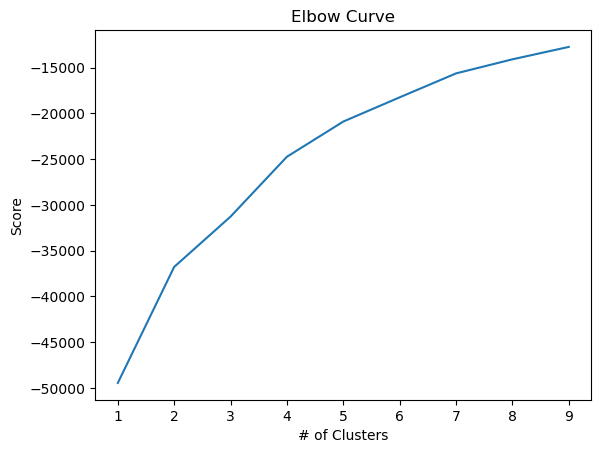

In [20]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl, score)
pl.xlabel('# of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.savefig(os.path.join(path, '03 Analysis','Visualizations', 'elbow_curve.png'))

**Notes:** Since the values are decreasing in smooth curve and I don't observe a clear elbow, I might want to explore alternative methods. 

Subjectively, I am opting in for 3 clusters due to the very slight bend point at 2 clusters.

---------------------------------------------------------------------------------------------------------------------------
### 5. K-means clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [22]:
# Fit the k-means object to the data.
kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [23]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

In [24]:
df_sub.head()

,Year Built,Length,Width,Price,# Views,clusters
0,1992.00,7.70,2.46,14900,3263,0
1,1979.00,11.12,3.88,35000,2432,0
2,2002.00,12.35,3.48,125900,2261,0
3,2009.00,20.30,5.20,949000,2154,0
4,1993.00,6.14,2.34,19900,2026,0


In [25]:
df_sub['clusters'].value_counts()

clusters
0    9569
2     286
1      33
Name: count, dtype: int64

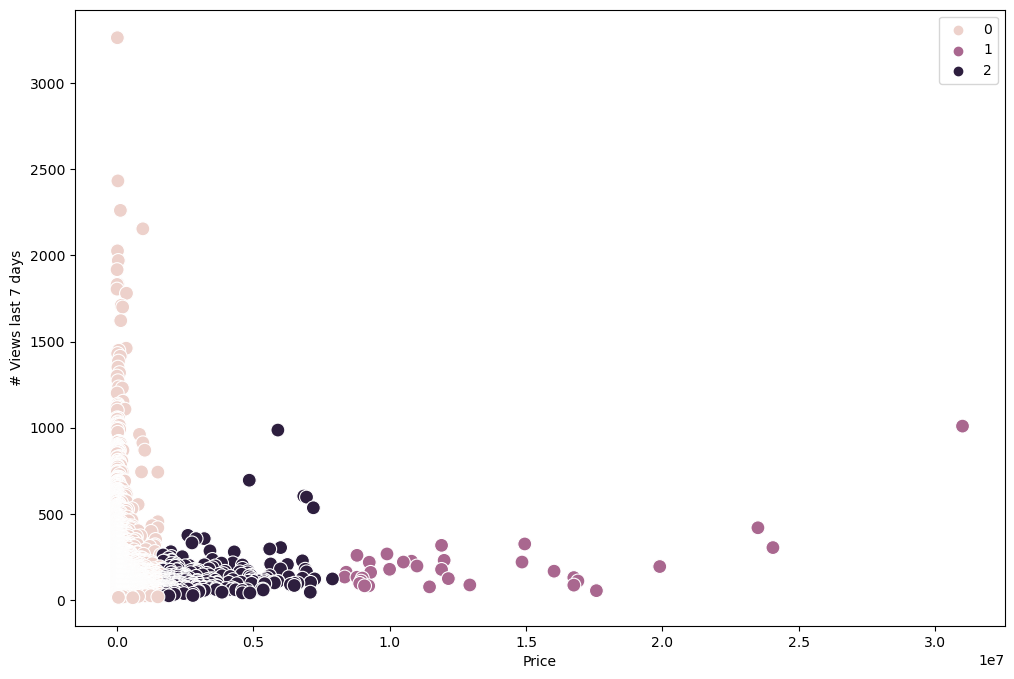

In [26]:
# Plot the clusters for the "Price" and "# Views" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Price'], y=df_sub['# Views'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background
plt.xlabel('Price')
plt.ylabel('# Views last 7 days')

plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'price_cluster.png'))

- **Notes:**  The predominant cluster is the pink one (0), which has the highest number of views and exhibits a high density towards lesser-priced yachts and boats.
---------------------------------------------------------------------------------------------------------------------------

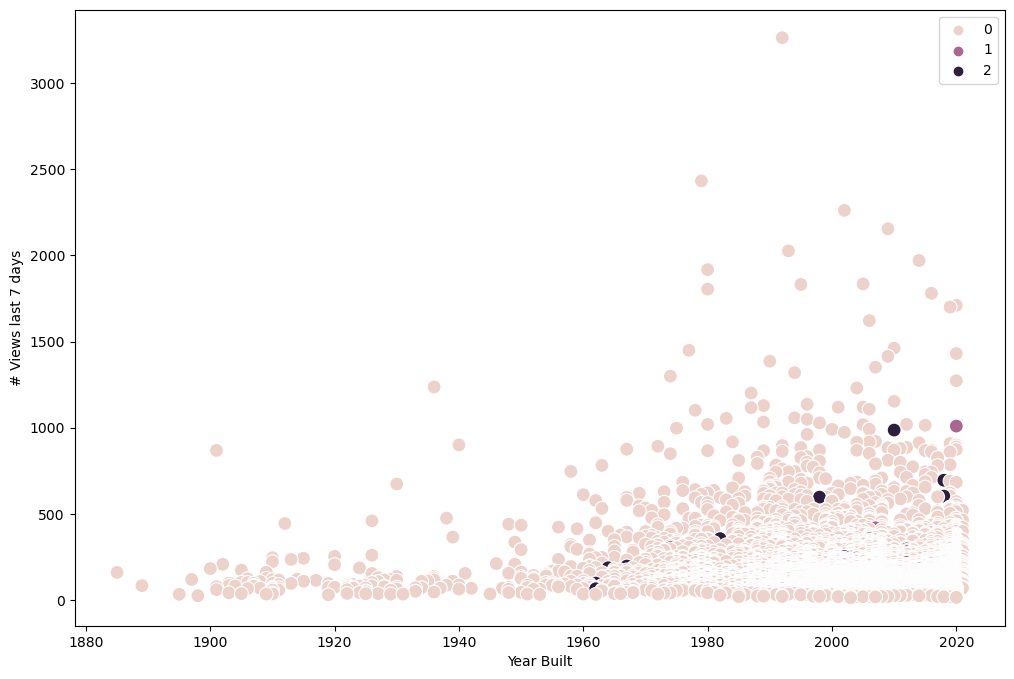

In [27]:
# Plot the clusters for the "Year Built" and "# Views" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Year Built'], y=df_sub['# Views'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('# Views last 7 days')

plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'year_built_cluster.png'))

- **Notes:** The predominant cluster is the pink one (Cluster 0), which displays the highest number of views, shows no discernable trends, and demonstrates a high density toward lesser-priced yachts and boats.
---------------------------------------------------------------------------------------------------------------------------

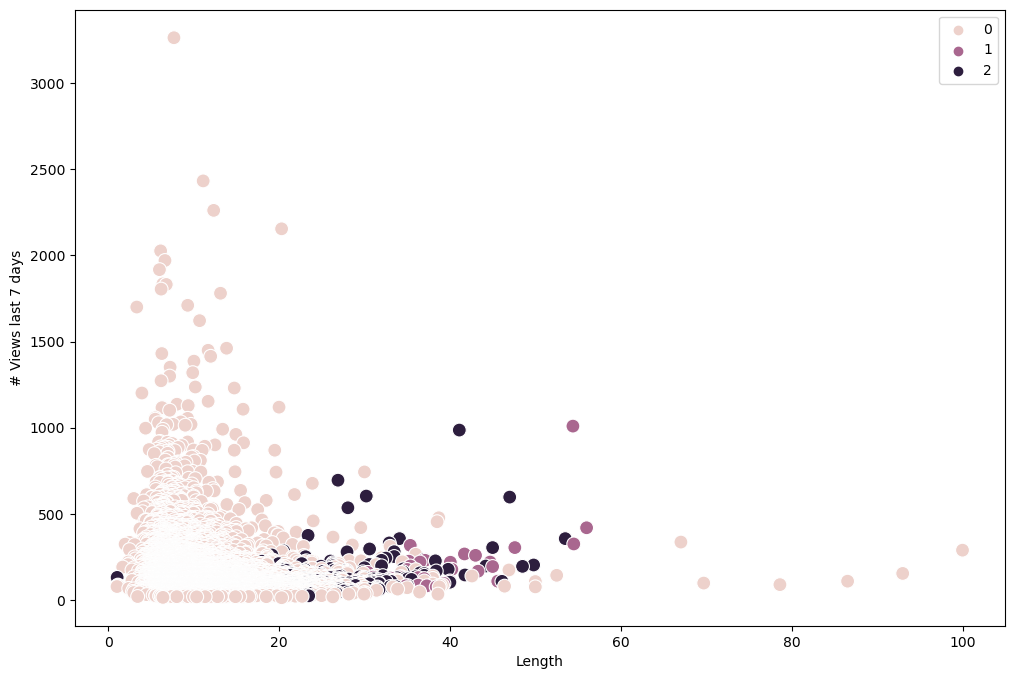

In [28]:
# Plot the clusters for the "Length" and "# Views" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Length'], y=df_sub['# Views'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length') 
plt.ylabel('# Views last 7 days')

plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'length_cluster.png'))

- **Notes:** The predominant cluster is the pink one (0), which has the highest number of views, displays no visible linear connection between variables, and exhibits a high density towards smaller length yachts and boats. (approx. 10m)
---------------------------------------------------------------------------------------------------------------------------

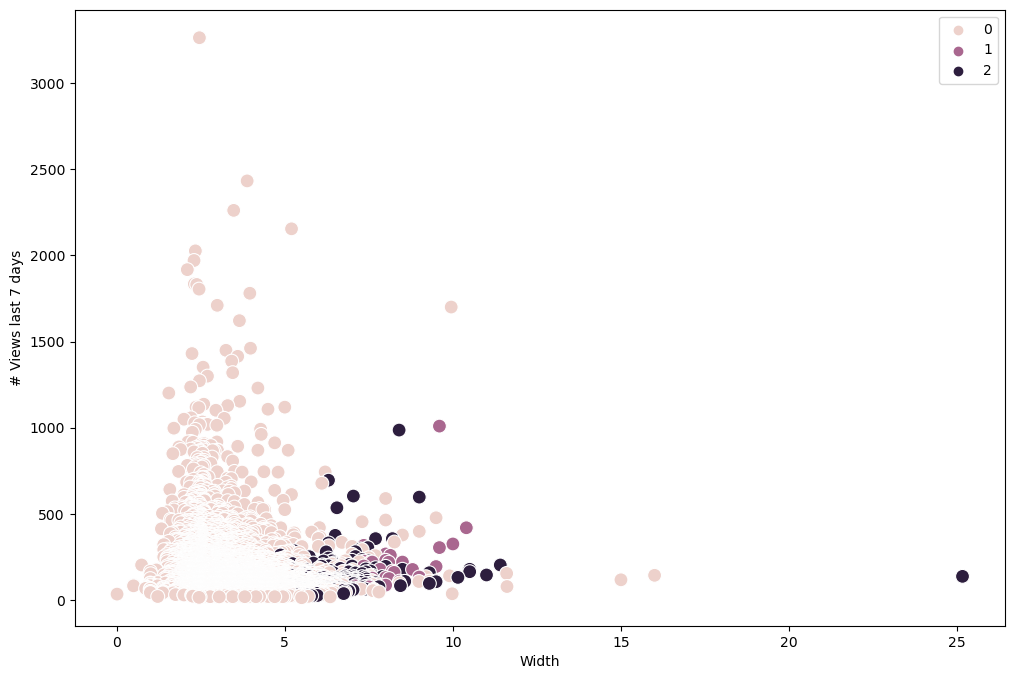

In [29]:
# Plot the clusters for the "Length" and "# Views" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Width'], y=df_sub['# Views'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Width') 
plt.ylabel('# Views last 7 days')

plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'width_cluster.png'))

- **Notes:** The predominant cluster is the pink one (0), which has the highest number of views, displays no visible linear connection between variables, and exhibits a high density towards smaller width yachts and boats. (around 2-5m)
---------------------------------------------------------------------------------------------------------------------------

In [30]:
# Create new column condition for cluster colors
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
# Calculate the descriptive statistics for your clusters using the groupby() function
df_sub.groupby('cluster').agg({'Year Built':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Width':['mean', 'median'],
                          'Price':['mean', 'median'],
                               '# Views':['mean', 'median']})

Year Built         Length        Width              Price  \
                  mean  median   mean median  mean median        mean   
cluster                                                                 
dark purple    2012.23 2013.00  24.83  23.95  6.18   6.16  3133412.79   
pink           2004.84 2008.00  11.08  10.00  3.42   3.30   191714.37   
purple         2014.94 2017.00  38.03  37.10  7.98   8.00 13177185.61   

                        # Views         
                 median    mean median  
cluster                                 
dark purple  2505704.00  125.58 101.50  
pink           89900.00  149.68 108.00  
purple      11460000.00  202.30 167.00

- **Notes about the cluster groups:**

**1. Pink:** (top performer)
   - **Year Built:** The mean and median year built are close, indicating a relatively uniform distribution. Most vessels in this cluster are from around 2008.
   - **Length and Width:** The mean and median lengths and widths are quite close, suggesting a relatively symmetric distribution in vessel size.
   - **Price:** This cluster has the lowest mean and median prices, indicating a concentration of more affordable yachts and boats. The price distribution appears left-skewed.
   - **Number of Views:** The mean and median number of views are both relatively high, suggesting a notable level of interest despite the lower prices.

**2. Dark Purple Cluster:** (least variance)
   - **Year Built:** The mean and median year built have a noticeable difference, indicating potential variability in the ages of vessels. The mean is higher, suggesting a mix of older and newer vessels.
   - **Length and Width:** The mean and median lengths and widths show some variability, suggesting a diverse range of vessel sizes.
   - **Price:** This cluster has moderate mean and median prices, indicating a mix of mid-range yachts. The price distribution appears balanced.
   - **Number of Views:** The mean and median number of views are both moderate, suggesting a moderate level of interest in this cluster.

**3. Purple Cluster:** ()
   - **Year Built:** The mean and median year built are close, indicating a relatively uniform distribution. Most vessels in this cluster are from around 2017.
   - **Length and Width:** The mean and median lengths and widths are quite close, suggesting a relatively symmetric distribution in vessel size.
   - **Price:** This cluster has the highest mean and median prices, indicating a concentration of high-end yachts. The price distribution appears right-skewed.
   - **Number of Views:** The mean and median number of views are both relatively high, suggesting a high level of interest in this cluster. 
   
(note: having fewer values in a cluster might make the mean (average) look higher, but when you actually look at the data visually, it might not be the case.)

---------------------------------------------------------------------------------------------------------------------------

1. **Popularity/Interest (Number of Views):**
   - The "Dark Purple Cluster" has consistently high mean and median values for the number of views, suggesting a notable level of interest. From this perspective, the Pink Cluster could be considered as performing well in terms of attracting attention.

2. **Affordability (Price):**
   - The "Pink Cluster" has the lowest mean and median prices, indicating a concentration of more affordable yachts and boats. If affordability is a key factor, the Dark Purple Cluster may be considered as performing well.

3. **Overall Value (Considering Price and Popularity):**
   - The "Dark Purple Cluster" shows a balance between moderate prices and moderate popularity, which might be considered a good combination of factors. The overall value could be seen as a performance metric, and in this case, the Pink Cluster might be a strong performer.

In [32]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_final1.csv'))
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_clusters.csv'))